
*   Project: Customer Segmentation 
*   Machine Learning Algorithms: Unsupervised learning - K-means Clustering




Data Preparation

In [ ]:
import os
checkFile = os.path.isfile("/content/E-Commerce Data.csv")
print("The path and file are valid or not :", checkFile)  

The path and file are valid or not : True


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv("/content/E-Commerce Data.csv", encoding = 'cp1252')

In [ ]:
print(data.shape)
display(data.head())

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Data Cleanning

In [ ]:
# Dataset has negative values in Quantity and UnitPrice. remove those entries from dataset
df = data[(data.Quantity > 0)]
df = df[(df.UnitPrice > 0)]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


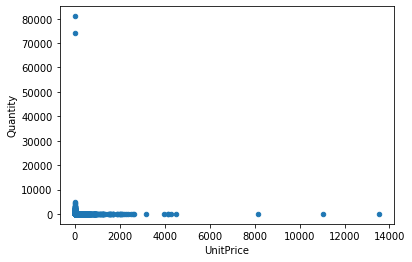

In [ ]:
plot = df.plot.scatter('UnitPrice', 'Quantity')

In [ ]:
# Based on the above graph we could see some of ouliers in the dataset
df = df[(df.Quantity < 10000)] 
df = df[(df.UnitPrice < 5000)]

In [ ]:
#Check Null values are present in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132218
Country             0
dtype: int64

In [ ]:
# Customer column has 132218 null values. Customer Id is unique values since we cant replace with any other values, hence remove it from the dataset
df=df.dropna(how = 'any', axis = 'rows')
df.shape

(397881, 8)

Data Transformation

In [ ]:
#Data Enrichment
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


Data Visualization

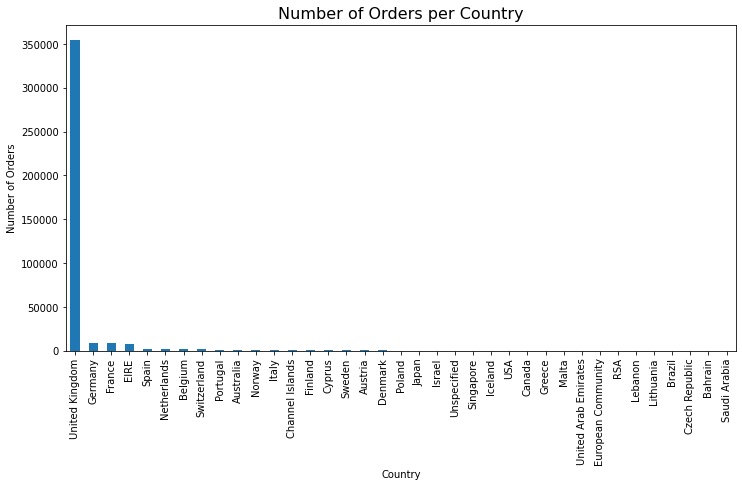

In [ ]:
ord_cnty = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

#Plot
plt.figure(figsize=(12,6))
ord_cnty.plot.bar()
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Country', fontsize=16)
plt.show()

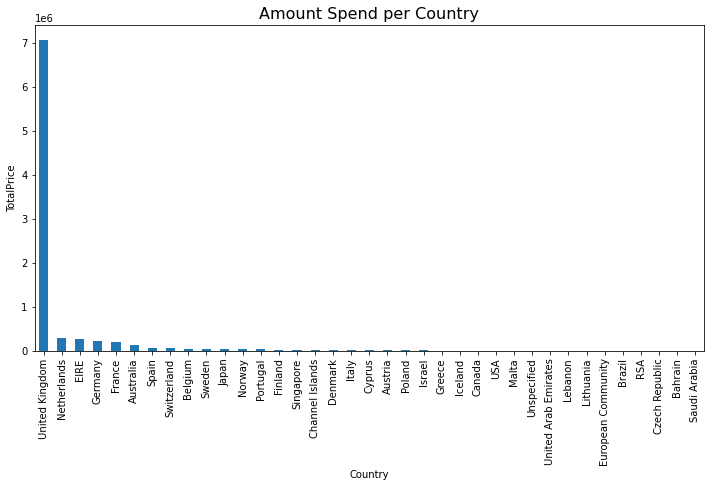

In [ ]:
amt_cnty = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

#Plot
plt.figure(figsize=(12,6))
amt_cnty.plot.bar()
plt.xlabel('Country')
plt.ylabel('TotalPrice')
plt.title('Amount Spend per Country', fontsize=16)
plt.show()

Machine learning Model: K-means Clustering

In [ ]:
dfg = df.groupby(by=['CustomerID'])['Quantity','TotalPrice'].agg({'Quantity':'sum','TotalPrice':'sum'}).reset_index()
dfg.rename(columns={'Quantity':'Total_Quantity','TotalPrice' : 'Total_Amount'},inplace=True)
dfg.head(3)

<ipython-input-126-caeded478ffa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfg = df.groupby(by=['CustomerID'])['Quantity','TotalPrice'].agg({'Quantity':'sum','TotalPrice':'sum'}).reset_index()


,CustomerID,Total_Quantity,Total_Amount
0,12347.0,2458,4310.00
1,12348.0,2341,1797.24
2,12349.0,631,1757.55


In [ ]:
X = dfg.iloc[:, [1, 2]].values
# Feature Scaling
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

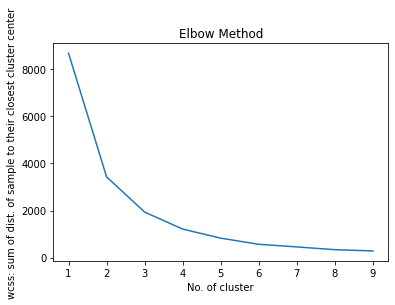

In [ ]:
wcss=[]
for n_clusters in range(1,10):
    kmeans=KMeans(n_clusters=n_clusters,init='k-means++',)
    #KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    clusters = kmeans.predict(X)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center')

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

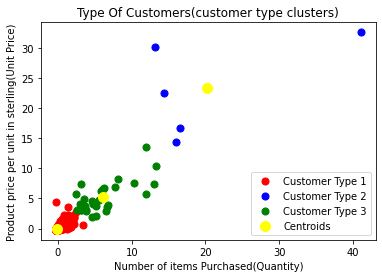

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.legend()
plt.show()